**Workshop #3**

**Angeles Arista Huerta** */  Agosto 15, 2022*

*Pruebas de hipotesis*

La prueba de hipotesis para la media de un grupo es usualmente llamada *one-sample t-test* (prueeba t de un grupo).

La prueba de hipotesis para la media de dos grupos es usualmente llamada *two-sample t-test* (prueba t de dos muestras).

En el caso de la *prueba t de dos muestras* se intenta comprobar si la media de un grupo es mayor que la media de otro grupo.

La hipotesis nula y alternativa se definen de la siguiente manera: 
> ***Ho**: Mx - My = 0

> ***Ha**: Mx - My != 0

donde:
* M - representra la media poblacional de la variable 

Para probar esta hipotesis son necesarias dos pruebas, una de X y una de Y para calcular sus medias.

*En este caso la variable de estudio es la diferencia de 2 medias*, por ello se define a la variable de estudio como diff
> diff = (X' - Y')

Los pasos para todas las pruebas de hipótesis son básicamente los mismos. Lo que cambia es el cálculo de: 

- Calcular el **standard error** el cual nos indica desviación estandar de la variable de estudio.

Asumiendo que la varianza de ambos grupo es ***diferente***, que el tamaño de las muestras es la misma(N) y que ninguna variable es dependiente de la otra; el calculo a realizar es el siguiente:
> SD(diff) = SE = sqrt((Var(X) + Var(Y)) / N)

*Esta formula es posible aplicarla solo si las muestras son independientes*

Si hay dependencia es necesario agregar otro término que sea igual a 2 veces la covarianza entre ambas variables.

*Como aprendimos en el CLT, la varianza de la media de una variable aleatoria se reduce según su tamaño muestral.*
 
La estadística t para la prueba t de dos muestras se calcula de la siguiente manera:
> t = (X' - Y') - 0) / (sqrt((Var(x)-Var(Y) / N) )

*El valor de t es el numero de desviaciones estandar de la variable de estudio, la diferencia de las 2 significa que la diferencia empírica que obtuvimos de los datos está lejos del valor hipotético, cero.*

La regla general a utilizar es tener evidencia estadística al menos en el nivel de confianza del 95% para rechazar la hipótesis nula o para apoyar la hipótesis alternativa.



**Nivel de Confianza**

*Tipo I.* ***ERROR Y PVALUE***

El nivel de confianza de una prueba esta relacionado por el nivel de error de la prueba.
Para obtener un nivel del confianza del 95%, existe la probabilidad de que se haga una conclusión erronea de rechazar la hipotesisi nula, el 5% de las veces. Este error también es denominado como *error de tipo I*

El pvalue de la prueba es la probabilidad exacta de generar un error de tipo I después del calculo de la estadistica t exacta. Esto quiere decir que el *pvalue* e la probabilidad de equivocarse al rechazar la hipótesis nula.

Para cada valor de t, corresponde un pvalue.
Para un nivel de confianza de 95% y *2-tailed pvalue*, el valor critico de t es cercano a 2, este puede cambiar de acuerdo al numero de observaciones de la muestra.

El *2-tailed pvalue* siempre será el doble de 1-tailed pvalue ya que la distribución t-Student es simetrica.
Siempre se buscara tener un pvalue muy pequeño para rechazar la hipotesis nula, por ello el *1-tailed pvalue* parece ser el valor que se desea, sin embargo el *2-tailed pvalue* es un valor más conservador.

*La mayor parte de los programas estadísticos y los lenguajes de computadora reportan pvalue de* ***2-tailed pvalue***




En terminos de nivel de confianza de la prueba, se puede definir el pvalue como:
> pvalue = (1 - NivelConfianza)

En el caso de un valor de *1-tailed* y un nivel de confianza del 95%, el valor t crítico es inferior a 2; es aproximadamente 1,65

*El pvalue no se puede calcular con una fórmula analítica ya que la integral de la normal Z o el t-Student PDF no tiene una solución analítica cercana. Es necesario usar tablas. Afortunadamente, todos los programas estadísticos y la mayoría de los lenguajes informáticos pueden calcular fácilmente los pvalues para cualquier prueba de hipótesis.

### *Reto*
Haga una prueba t para verificar si el retorno CC mensual medio de AMD (AMD) es mayor que el rendimiento mensual medio de Intel. Utilice datos desde enero de 2017 hasta la fecha.

In [13]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['AMD','INTC'],start="01/01/2017", end="08/15/2022",interval="m")
sprices=sprices['Adj Close']

In [14]:
# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()

In [15]:
# Stating the hypotheses: 
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.4260080418787056

In [16]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.15718167528172203

In [17]:
# Using the ttest_ind function from stats:
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.4260080418787056, pvalue=0.15718167528172203)

In [18]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

C:\Users\angix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.031376  0.162913  0.019903  -0.008361  0.071114
 1      INTC   67.0  0.000003  0.076738  0.009375  -0.018715  0.018721
 2  combined  134.0  0.015690  0.127831  0.011043  -0.006153  0.037532,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    0.0314
 1       Degrees of freedom =   94.7595
 2                        t =    1.4260
 3    Two side test p value =    0.1572
 4   Difference < 0 p value =    0.9214
 5   Difference > 0 p value =    0.0786
 6                Cohen's d =    0.2464
 7                Hedge's g =    0.2450
 8            Glass's delta =    0.1926
 9              Pearson's r =    0.1449)

---

**Mdeidas de relación lineal**

Las dos principales medidas de relación lineal entre dos variables son:

* Covarianza
* Correlación

Ejemplo

In [19]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


GSPC significa Global Standard & Poors Composite, que es el índice S&P500.

<Figure size 432x288 with 0 Axes>

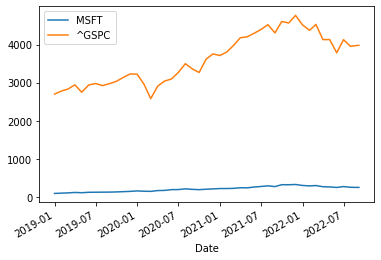

In [20]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

El rango de precios de las acciones y los índices del mercado puede variar mucho, por lo que esto dificulta la comparación de los movimientos de precios en un gráfico.

Parece que el GSPC ha tenido un mejor rendimiento, pero esto es engañoso ya que ambas inversiones tienen diferentes rangos de precios.

Al comparar el rendimiento de 2 o más valores y/o índices, es una buena idea generar un índice para cada serie, de modo que podamos emular cuánto $1,00 invertido en cada acción/índice se habría movido con el tiempo. Podemos dividir el precio de las acciones de cualquier mes por el precio de las acciones del primer mes para obtener un factor de crecimiento.

Este factor de crecimiento es como un índice de la variable original. Ahora podemos trazar estos 2 nuevos índices a lo largo del tiempo y ver qué inversión fue mejor:

<Figure size 432x288 with 0 Axes>

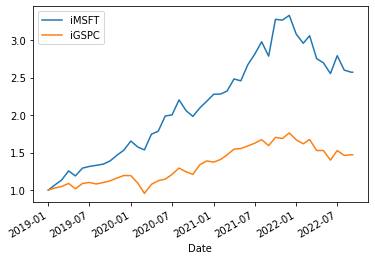

In [21]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

Ahora tenemos una imagen mucho mejor de qué instrumento ha tenido un mejor rendimiento a lo largo del tiempo. La línea de cada instrumento representa cuánto $1,00 invertido el instrumento habría estado cambiando con el tiempo.

Ahora calculamos rendimientos mensuales compuestos continuamente

In [22]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

r.head() 
#Ahora el marco de datos r tendrá 2 columnas
#para ambos retornos históricos cc

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


Para aprender de la posible relación entre GSPC y MSFT se puede observar sus precios y los retornos

<Figure size 432x288 with 0 Axes>

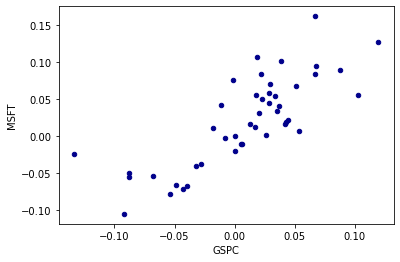

In [23]:
# scatter plot to see whether there is a linear relationship 
# between the MSFT prices and the GSPC index
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

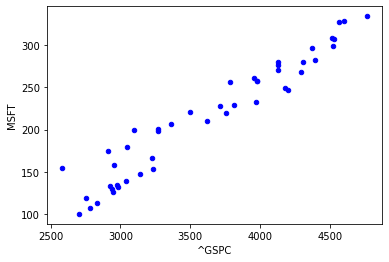

In [24]:
# Se puede realizar un diagrama de dispersión para visualizar la 
# relación entre los retornos MSFT y los retornos GSPC
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='Blue')
plt.show()

El diagrama de dispersión que utiliza los precios transmite una relación lineal aparentemente más fuerte en comparación con el gráfico de dispersión que utiliza rendimientos.

Los rendimientos de las acciones son variables que generalmente NO crecen con el tiempo; parecen una trama de bits de corazón

<Figure size 432x288 with 0 Axes>

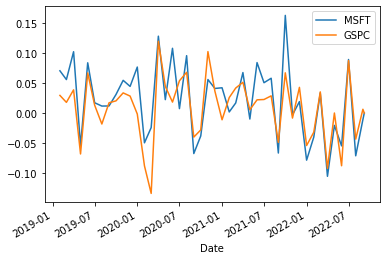

In [25]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

Los resultados de las acciones se comportan como una variable estacionaria, ya que no tienen una tendencia creciente o descendente con el tiempo. 

*Una variable estacionaria es una variable que tiene un promedio y una desviación estándar similares en cualquier período de tiempo.*

Los precios de las acciones (y los índices) son variables que suelen crecer con el tiempo (tarde o temprano). Estas variables se denominan variables no estacionarias.

*Una variable no estacionaria normalmente cambia su media dependiendo del período de tiempo.*

En las estadísticas, tenemos que ser muy cuidadosos al observar las relaciones lineales cuando se utilizan variables no estacionarias, como los precios de las acciones. Es muy probable que terminemos con medidas falsas de relaciones lineales cuando usamos variables no estacionarias. Para aprender más sobre el riesgo de estimar las relaciones falsas, cubriremos este tema en el tema de los modelos de regresión de series temporales (tratados en un módulo más avanzado).

*En este caso, es mejor observar la relación lineal entre los rendimientos de las acciones (no los precios).*

***Covarianza***

Covarianza entre dos variables es el promedio del producto de desviaciones para la media de cada variable.

El calculo de ese promedio se puede representar como:

> Cov(x,y) = 1/N sum[(xi-x')(yi-y')]

*La covarianza también se define como el valor esperado de las desviaciones del producto:*

> Cov(x,y) = 1/N sum[(xi * yi)-(x' * y')]

La relación de la sumatoria de la diferencia entre el producto de la muestra x&y menos el producto de la media de x&y, entre la cantidad de muestras.

Dado que la Varianza es un caso especial de la Covarianza - la varianza es la covarianza de una variable consigo misma - entonces también podemos decir que:

> Var(x) = 1/N * sum((xi)^2-(x')^2)

La fórmula de covarianza de la muestra es muy similar, pero se divide por N-1 en lugar de N para obtener el promedio de desviaciones del producto:
> Cov(x,y) = 1/(N-1) * sum[(xi * yi)-(x' * y')]

###### En Estadística, asumimos que trabajamos con muestras y nunca tenemos acceso a la población, así que cuando calculamos una medida de muestra, siempre perdemos datos. La fórmula de la muestra calculará una fórmula más conservadora que la fórmula de la población. Esa es la razón por la que usamos N-1 como grado de libertad en lugar de N.

La covarianza de la muestra será siempre un poco mayor que la covarianza de la población, pero será similar. Cuando N es grande (N>30), los valores de covarianza de la población y la muestra serán casi los mismos. 
###### La fórmula de covarianza de muestra es la fórmula predeterminada para todo el software estadístico.

* Si *Cov(X,Y)>0*, podemos decir que, en promedio, existe una relación lineal positiva entre X e Y. 

Una relación lineal positiva entre X e Y significa que si X aumenta, es probable que Y también aumente; y si X disminuye, es probable que Y también disminuya.

* Si *Cov(X,Y)<0*, podemos decir que existe una relación negativa entre X e Y.

Un valor de relación lineal negativa entre X e Y significa que si X aumenta, es probable que Y disminuya; y si X disminuye, es probable que Y aumente.

Si podemos probar que CoV(X,Y) es positivo y significativo, necesitamos hacer una prueba de hipótesis. Si el valor de valoración < 0,05 y el valor de CoV(X,Y) es positivo, entonces podemos decir que tenemos una confianza del 95% de que hay una relación lineal.

No hay restricción en los valores que se pueden obtener de Cov(X,Y):

> -infinito < Cov(X,Y) < infinito

*Podemos interpretar el signo de la covarianza, pero NO podemos interpretar su magnitud.* 

Para solucionar el problema de interpretación se utiliza la medida de **correlación**. 

***Correlación***

La correlación es una medida muy práctica de relación lineal ya que podemos interpretar su signo y magnitud, ya que los posibles valores de correlación van de -1 a 1 y representan el porcentaje de relación lineal.

Es una medida muy práctica al buscar una relación lineal entre 2 variables aleatorias. 

Es una versión a escala de la Covarianza, Si se divide la covarianza de X&Y por el producto de las desviaciones estándar de X&Y, se obtiene la correlación:

> Corr(x,y) = Cov(x,y) / (SD(x) * SD(y))

*Este valor se encuentra en un rango de valores de -1 a 1*

> -1 <= Corr(X,Y) <= 1

* Si Corr(X,Y) = 1, eso significa que X se mueve exactamente de la misma manera que Y, por lo que Y es proporcional (en la misma dirección) que X; en realidad Y debería ser igual a X multiplicado por número.

* Si Corr(X,Y) = -1 significa que Y se mueve exactamente proporcional a X, pero en la dirección opuesta.

* Si Corr(X,Y) = 0 significa que los movimientos de Y no están relacionados con los movimientos de X. En otras palabras, que X e Y se mueven independientemente unos de otros; en este caso, no hay un patrón lineal claro de cómo se mueve Y cuando se mueve X.

* Si 0 < Corr(X,Y) < 1 significa que hay una relación lineal positiva entre X e Y. La fuerza de esta relación viene dada por la magnitud de la correlación. Por ejemplo, si corr(X,Y) = 0,50, significa que si X aumenta, hay una probabilidad del 50% de que Y también aumentará.

* Si -1 < corr(X,Y) < 0 significa que hay una relación lineal negativa entre X e Y. La fuerza de esta relación viene dada por la magnitud de la correlación. Por ejemplo, si corr(X,Y) = - 0,50, significa que si X aumenta, hay una probabilidad del 50% de que Y disminuya (y viceversa).

Si queremos probar que *Corr(X,Y)* es **positiva y significativa**, necesitamos hacer una prueba de hipótesis. La fórmula para el error estándar (desviación estándar de la correlación) es:

> SD(Corr) = sqrt((1 - Corr^2) / (N - 2))

El valor de t para esta prueba de hipotesis esta dado por:

> t = Corr / sqrt((1 - Corr^2) / (N - 2))

* Si corr(X,Y)>0 y t>2 (su pvalue será *pvalue < 0,05*), entonces se puede decir que se tiene una confianza del 95% de que hay una relación lineal positiva; en otras palabras, que la correlación es positiva y estadísticamente significativa (significativamente mayor que cero).

---

**Calculo de covarianza y correlación**

In [ ]:
# Covarianza
# aplicando la formula se obtiene 
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

In [ ]:
# Covarianza con numpy
covm = np.cov(r['MSFT'],r['GSPC'])
covm

###### La función *.cov* calcula la matriz de covarianza utilizando ambos retornos. Podemos encontrar la covarianza en los elementos no diagonales, que serán los mismos valores ya que la matriz de covarianza es simétrica.

###### Los valores diagonales tienen las varianzas de cada retorno ya que la covarianza de una variable consigo misma es en realidad su varianza *(Cov(X,X) = Var(X))*.

In [ ]:
# extraer el elemento de la fila 1 y columna 2 de la matriz
# para obtener la covarianza entre los retornos de MSFT y GSPC
cov = covm[0,1]
cov

In [ ]:
# matriz de correlación con numpy
# usar funcion corrcoef 
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

###### La matriz de correlación tendrá 1 en su diagonal, ya que la correlación de una variable consigo misma es 1. El valor no diagonal será la correlación real entre las 2 variables correspondientes (la de la fila y la de la columna).

In [ ]:
# Calculo manual de correlación usando los valores de covarianza
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

In [ ]:
# función scipy pearsonr para calcular la correlación y el pvalue de 2 cola
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

El pvalue es casi cero.  Los rentornos de MSFT y GSPC tienen una correlación positiva y muy significativa (en el nivel de confianza de 99.9999...%.

---
Ejercicios y notas extras

In [26]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

Amd = pdr.get_data_yahoo('AMD', start = "15/08/2021", interval = "d") 
Intel = pdr.get_data_yahoo('INTC', start = "15/08/2021", interval = "d") 
#Amd.head()
#Intel.head()

C:\Users\angix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas_datareader\_utils.py:33: UserWarning: Parsing '15/08/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start = to_datetime(start)
C:\Users\angix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas_datareader\_utils.py:33: UserWarning: Parsing '15/08/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start = to_datetime(start)


* H0: mean(r_AAPL) - mean(r_MSFT) = 0
* Ha: mean(r_AAPL) - mean(r_MSFT) <>0

**Medidas de relación lineal**

*el error estandar es una desviación estandar de la variable de estudio analizada (que tanto varia con respecto a si misma) en variables de series de tiempo* ***Time Series Datasets*** 

Empirical value - 

> pvalue = 2 * st.t.sf(np.abs(t), df) 


variable uno / variable dos / asumes que son diferentes

t - distancia de las desviaciones estandar de la diferencia de los promedios de las variables analizadas (el retorno de una variable es 1.46 )

siempre se busca rechazar la hipotesis nula 
pvalue 
